# Numpy exercises

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 1. Numpy basic exercises

Use vectorization and avoid for loops in all exercises. Implement each exercise as a single function and write test cases for the function.

## 1.1 Implement standardization for 2D arrays.

\begin{equation*}
X_{std} = \frac{X - \mu}{\sigma},
\end{equation*}

where $\mu$ is the mean and $\rho$ is the standard deviation of the array elements.

In [2]:
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

x_std = standardize(np.array([[1, 2], [2, 3], [1, 2]]))
x_std

array([[-0.70710678, -0.70710678],
       [ 1.41421356,  1.41421356],
       [-0.70710678, -0.70710678]])

## 1.2 Implement normalization for 2D arrays.

\begin{equation*}
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
\end{equation*}

In [3]:
# column wise
def normalize(X):
    Xmin = X.min(axis=0)
    return (X - Xmin) / (X.max(axis=0) - Xmin)

X = np.arange(6).reshape(3, 2)
normalize(X)

array([[0. , 0. ],
       [0.5, 0.5],
       [1. , 1. ]])

## 1.3 Implement the softmax function.
$$
x_i \mapsto \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)}
$$

In [4]:
def softmax(X):
    return np.exp(X) / np.exp(X).sum(axis=1)[:, None]

X = np.arange(12).reshape(3, -1)
softmax(X)

array([[0.0320586 , 0.08714432, 0.23688282, 0.64391426],
       [0.0320586 , 0.08714432, 0.23688282, 0.64391426],
       [0.0320586 , 0.08714432, 0.23688282, 0.64391426]])

# 2. Vectorization

Rewrite the following examples into vectorized solutions (no for loops and list comprehensions).

## 2.1 Row-wise Euclidean norm

Write a function which has one parameter, a 2D array and it returns a vector of row-wise Euclidean norms of the input. Use `numpy` operations and vectorization, avoid `for` loops. The solution below is a _bad_ solution.

In [5]:
def rowwise_norm(X):
    def my_dot(x, y):
        result = 0.0
        for i in range(len(x)):
            result += x[i] * y[i]
        return result
    return np.array([np.sqrt(my_dot(x, x)) for x in X])

X = np.arange(5)[:, None]*np.ones((5, 3));
print(X)
print(rowwise_norm(X))
print(rowwise_norm([[1], [-1], [1], [-1]]))

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [4. 4. 4.]]
[0.         1.73205081 3.46410162 5.19615242 6.92820323]
[1. 1. 1. 1.]


In [6]:
def rowwise_norm(X):
    M = X.shape[0]
    return np.sqrt(np.dot(X, X.T)[np.arange(M), np.arange(M)])

rowwise_norm(X)

array([0.        , 1.73205081, 3.46410162, 5.19615242, 6.92820323])

## 2.2 Chessboard

Write a function which has one parameter, a positive integer $n$, and returns an $n\times n$ array of $\pm1$ values like a chessboard: $M_{i,j} = (-1)^{i+j}$.

In [7]:
def chessboard(n):
    return np.array([[(-1)**(i + j) for j in range(n)] for i in range(n)])

chessboard(5)

array([[ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [ 1, -1,  1, -1,  1]])

In [8]:
def chessboard(n):
    # bools subclass integers, so we can do arithmetic directly on bools,
    # but I like this solution better
    # return (np.arange(n*n).reshape((n, n)) % 2 == 0).astype(int) * 2 - 1
    return (np.arange(n*n).reshape((n, n)) % 2 == 0) * 2 - 1

chessboard(4)

array([[ 1, -1,  1, -1],
       [ 1, -1,  1, -1],
       [ 1, -1,  1, -1],
       [ 1, -1,  1, -1]])

# 3. Broadcast quiz

Do the following operations work and if so, what is the shape of the resulting array?
* Try to figure it out before evaluating the cell.

In [9]:
np.ones(3) + np.ones((3,3))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [10]:
np.ones(3) + np.ones((4, 3))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [11]:
np.ones(3) + np.ones((3, 4))

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

In [12]:
np.ones(3)[:, None] + np.ones((3, 4))

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [13]:
np.ones((1, 2, 3)) + np.ones((1, 3))[:, None, :]

array([[[2., 2., 2.],
        [2., 2., 2.]]])

In [14]:
np.ones((1, 2, 3)) + np.ones((1, 3))

array([[[2., 2., 2.],
        [2., 2., 2.]]])

Can you broadcast these arrays such that they can be added? What will be the shape of the result?

In [15]:
np.ones((4,20,3)) + np.ones((5, 3))

ValueError: operands could not be broadcast together with shapes (4,20,3) (5,3) 

# 4. Numpy advanced exercises

## 4.1 Blockmatrix

Write a function named __`blockmatrix`__ that produces the following (block) matrix:
$$
\left(\begin{array}{ccc|ccc}
 1 & & 0& 0 & \cdots & 0 \\
 & \ddots & & \vdots & & \vdots \\
  0& & 1 & 0 & \cdots & 0 \\\hline
  0 & \cdots & 0 & 1 & \cdots & 1 \\
  \vdots & & \vdots & \vdots & & \vdots \\
  0 & \cdots & 0 & 1 & \cdots & 1
\end{array}\right)
$$
The function should have 2 positive integer parameters, the size of the first square block and the size of the last square block. The other two blocks should have the appropriate size (may be rectangle).
The first block is an indentity matrix, the last is a constant $1$ matrix.
Return the resulted matrix.

Use matrix initializers: `ones`, `zeros`, `eye` and concatenation.

In [16]:
def blockmatrix(K, L):
    return np.concatenate((
        np.concatenate((np.eye(K), np.zeros((K, L))), axis=1),
        np.concatenate((np.zeros((L, K)), np.eye(L)), axis=1),
    ), axis=0)

blockmatrix(4, 2)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

## 4.2 Blockmatrix from arbitrary square matrices

Write a blockmatrix function that takes any number of square matrices and returns a blockmatrix with these matrices in the diagonal.

In [17]:
def super_blockmatrix(*matrices):
    # let's use hstack and vstack in this example
    Ns = [m.shape[0] for m in matrices]
    Ms = [m.shape[1] for m in matrices]
    N = sum(m.shape[0] for m in matrices)
    M = sum(m.shape[1] for m in matrices)
    
    mtx = np.hstack((matrices[0], np.zeros((Ns[0], M-Ms[0]))))
    for i in range(1, len(matrices)):
        block = np.hstack((np.zeros((Ns[i], sum(Ms[:i]))), matrices[i], np.zeros((Ns[i], sum(Ms[i+1:])))))
        mtx = np.vstack((mtx, block))
    
    return mtx
    
super_blockmatrix(np.eye(3), np.ones((4, 4)), np.eye(3))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## 4.3 Derivative

Write a function which numerically derivates a $\mathbb{R}\mapsto\mathbb{R}$ function. Use the forward finite difference.

The input is a 1D array of function values, and optionally a 1D vector of abscissa values. If not provided then the abscissa values are unit steps.

The result is a 1D array with the length of one less than the input array.

Use `numpy` operations instead of `for` loop in contrast to the solution below.

In [18]:
def derivate(f, x=None):
    if x is None:
        x = np.arange(len(f))
    return np.array([(f[i+1] - f[i]) / (x[i+1] - x[i]) for i in range(len(x) - 1)])

derivate(np.arange(10)**2)

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.])

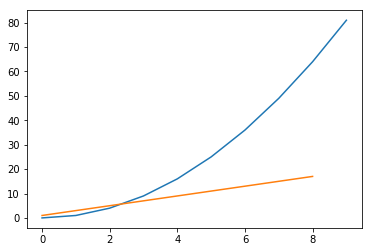

In [19]:
x = np.arange(10)
plt.plot(x, x**2)
plt.plot(x[:-1], derivate(x**2, x))

In [20]:
def derivate(f, x=None):
    if x is None:
        x = np.arange(f.shape[0])
    return (f[1:] - f[:-1]) / (x[1:] - x[:-1])

derivate(np.arange(10) ** 2)

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17.])

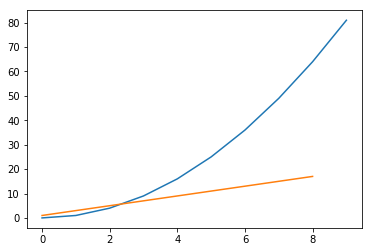

In [21]:
x = np.arange(10)
plt.plot(x, x**2)
plt.plot(x[:-1], derivate(x**2, x))

## 4.4 Birthday problem

In probability theory, the birthday problem or birthday paradox concerns the probability that, in a set of n randomly chosen people, some pair of them will have the same birthday. By the pigeonhole principle, the probability reaches 100% when the number of people reaches 367 (since there are only 366 possible birthdays, including February 29). However, 99.9% probability is reached with just 70 people, and 50% probability with 23 people. These conclusions are based on the assumption that each day of the year (excluding February 29) is equally probable for a birthday. -- [Wikipedia](https://en.wikipedia.org/wiki/Birthday_problem)

Write a function that simulates this problem for variable $n$. Your function should take $n$ and an experiment count as its parameter and sample experiment count times and return the ratio of "birthday collisions" (how many times there were at least two birthdays on the same day).

Run it for different $n$ values with at least 1000 experiment count and plot the results. You can add a grid and check for the 50% probability with:

    fig, ax = plt.subplots()
    ax.plot(x)
    ax.grid()

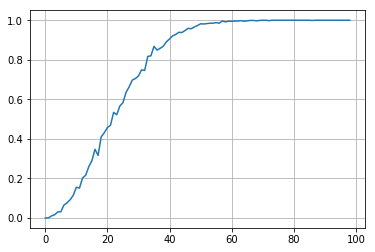

In [22]:
def birthday(n, exp_count):
    collision = 0
    for _ in range(exp_count):
        birthdays = np.random.randint(365, size=n)
        if np.unique(birthdays).shape[0] < n:
            collision += 1
    return collision / exp_count

probs = []
for n in range(1, 100):
    probs.append(birthday(n, 1000))
    
fig, ax = plt.subplots()
ax.plot(probs)
ax.grid()

## 4.5 Horner's method

Implement the [Horner's method](https://en.wikipedia.org/wiki/Horner%27s_method#Description_of_the_algorithm) for evaluating polynomials. The first input is a 1D array of numbers, the coefficients, from the constant coefficient to the highest order coefficent. The second input is the variable $x$ to subsitute. The function should work for all type of variables: numbers, arrays; the output should be the same type array as the input, containing the elementwise polynomial values.

In [ ]:
def horner(C, x):
    y = np.zeros_like(x)
    # TODO
    return y

C = [2, 0, 1] # 2 + x^2
print(horner(C, 3))
print(horner(C, [3, 3]))
print(horner(C, np.arange(9).reshape((3,3))))